In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df = df[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront']]

colunas_para_remover = ['id', 'date']
df = df.drop(colunas_para_remover, axis=1)

rows, cols = df.shape
print(f'Linhas: {rows}. Colunas: {cols}')

Linhas: 21613. Colunas: 7


In [3]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0,221900.0,3,1.00,1180,5650,1.0,0
1,538000.0,3,2.25,2570,7242,2.0,0
2,180000.0,2,1.00,770,10000,1.0,0
3,604000.0,4,3.00,1960,5000,1.0,0
4,510000.0,3,2.00,1680,8080,1.0,0


In [4]:
x = df.drop('price', axis=1)
y = df['price']

In [5]:
# normalizador
from sklearn.preprocessing import StandardScaler

# normalização dos dados
min_max_scaler = StandardScaler()
x = min_max_scaler.fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

print(f'Exemplos para o treinamento: {len(y_train)}. E para o teste: {len(y_test)}')

Exemplos para o treinamento: 15129. E para o teste: 6484


# Regressão Linear

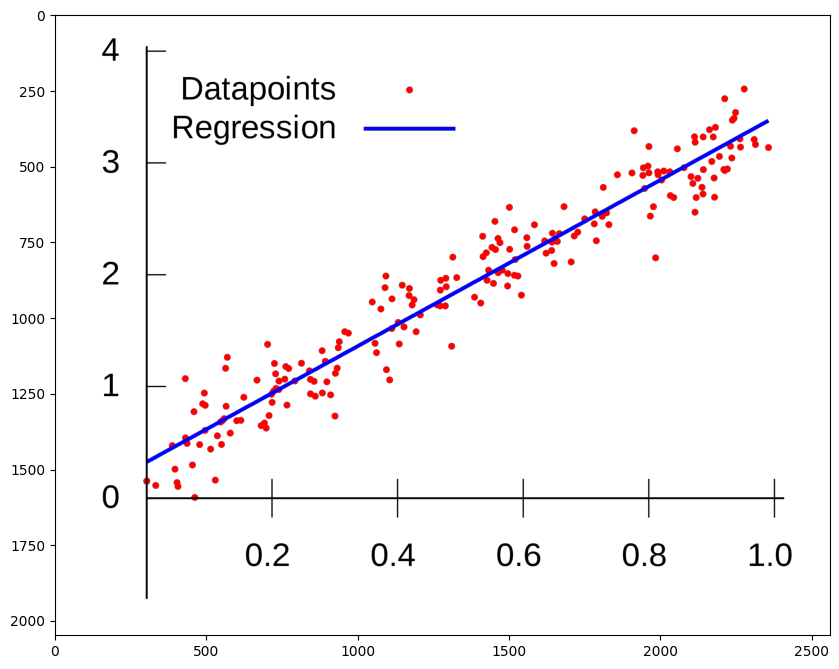

In [12]:
# https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear
im = plt.imread('./img/2560px-LinearRegression.svg.png')
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.show()

In [7]:
# métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [8]:
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test,y_pred)

print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 58290430743.82154
RMSE: 241434.11263494132
MAPE: 0.3468906172169916


/Users/mm/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# K-NN Regressor

In [9]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=7, metric='euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mape = mean_absolute_percentage_error(y_test,y_pred)
print(f'MAPE: {mape}')

MAPE: 0.324655444199613


# Support Vector Machines para Regressão (SVR)

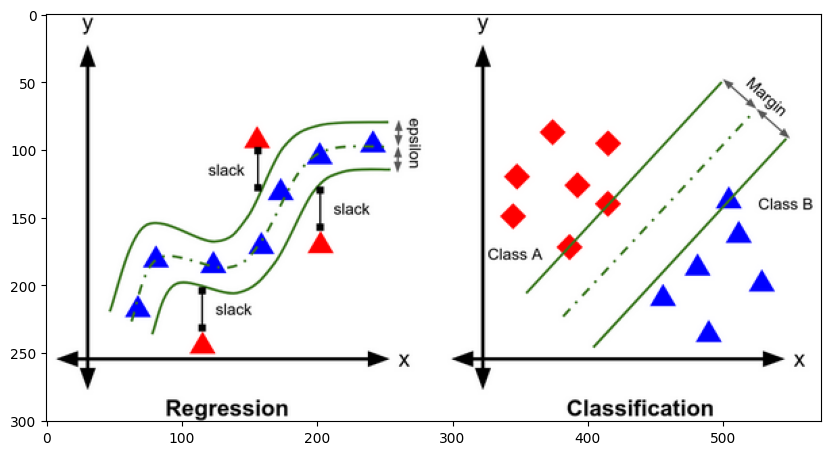

In [13]:
# https://medium.com/it-paragon/support-vector-machine-regression-cf65348b6345
im = plt.imread('./img/svr.png')
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.show()

In [14]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mape = mean_absolute_percentage_error(y_test,y_pred)

print(f'MAPE: {mape}')

MAPE: 0.4214532788664194


In [15]:
model = SVR(kernel='linear', C=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mape = mean_absolute_percentage_error(y_test,y_pred)

print(f'MAPE: {mape}')

MAPE: 0.32089126628819453


# Árvore de Regressão

In [16]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mape = mean_absolute_percentage_error(y_test,y_pred)

print(f'MAPE: {mape}')

MAPE: 0.4106813880837295


# XGBoost

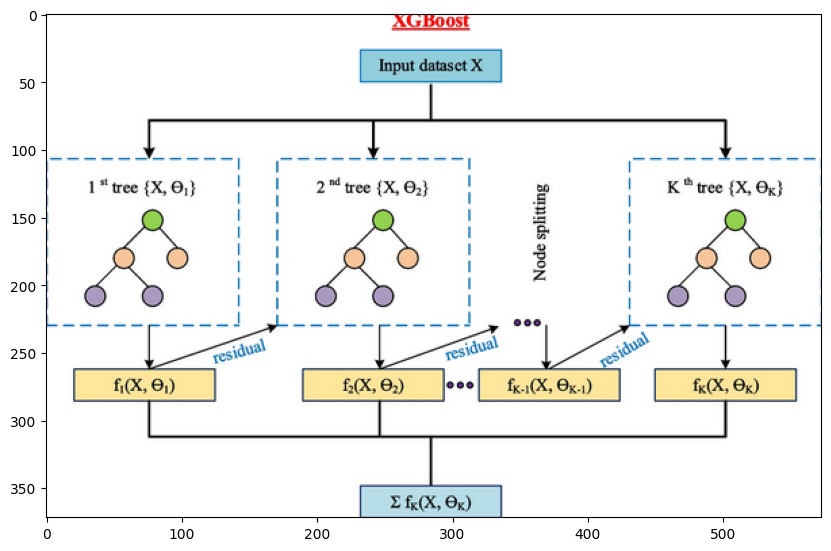

In [17]:
# https://www.researchgate.net/figure/The-XGBoost-algorithm-structure_fig4_378851394
im = plt.imread('./img/xgboost.png')
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.show()

In [18]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mape = mean_absolute_percentage_error(y_test,y_pred)

print(f'MAPE: {mape}')

MAPE: 0.3115478188030054


In [19]:
params = {"n_estimators": 100,
           "max_depth": 6,
           "learning_rate": 0.1}

# Treinando o modelo
model = XGBRegressor(**params)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mape = mean_absolute_percentage_error(y_test,y_pred)

print(f'MAPE: {mape}')

MAPE: 0.30671574201583884
